### Introduction

**Project**: Final Team Project Group 1
**Team**: Lokesh Upputri, Safwan Syed

**Title**: Predicting Wine Quality Using Machine Learning Techniques

For our final project, we're working on building a strong predictive model to figure out wine quality based on its physicochemical properties. We're using the UCI Wine Quality dataset for this. Our main goals are to clean up the data, do a thorough exploratory data analysis, pick the best features, and then use different machine learning algorithms to classify wine quality. By testing these models, we hope to find the best way to accurately predict wine quality.

**Data Source**: The dataset is sourced from the UCI Machine Learning Repository and can be accessed [here](https://archive.ics.uci.edu/dataset/186/wine+quality).

**Dataset Details**:
- **Number of Variables**: 11
- **Size of Dataset**: 89.2 KB
- **Citation**: Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T

Our goal is to use machine learning to find patterns in wine quality prediction and contribute to data-driven decisions in the wine industry.




### Data Cleaning/Preparation

In [5]:
import pandas as pd

# Read the red wine quality data
red_wine = pd.read_csv('winequality-red.csv', sep=';')

# Read the white wine quality data
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Combine the two DataFrames
combined_wine = pd.concat([red_wine, white_wine], ignore_index=True)

# Save the combined data to a new CSV file
combined_wine.to_csv('combined_winequality.csv', index=False, sep=';')

### Exploratory Data Analysis

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

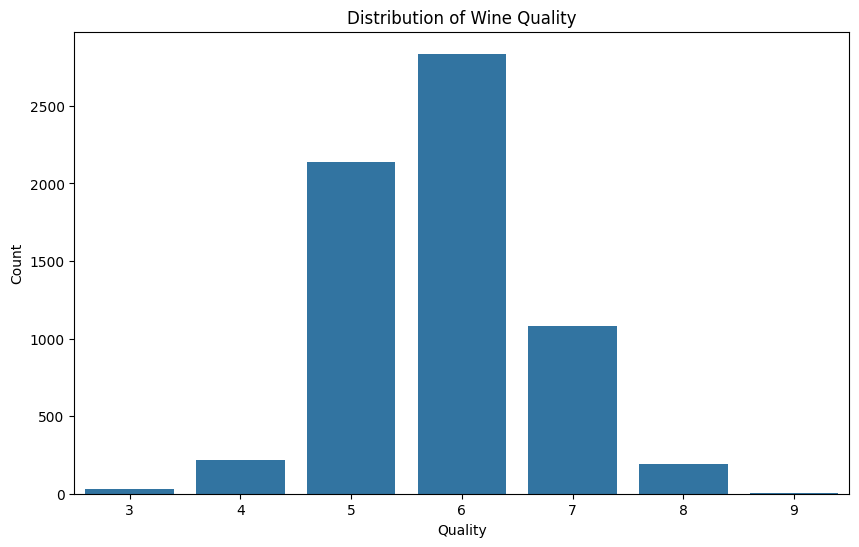

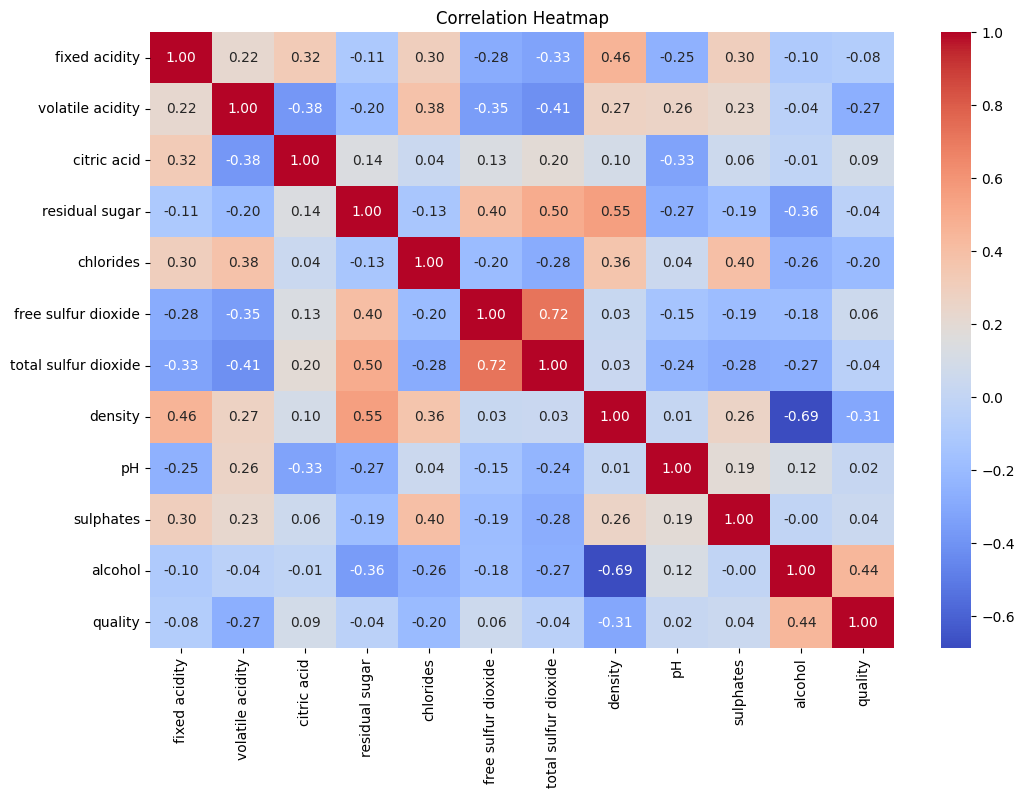

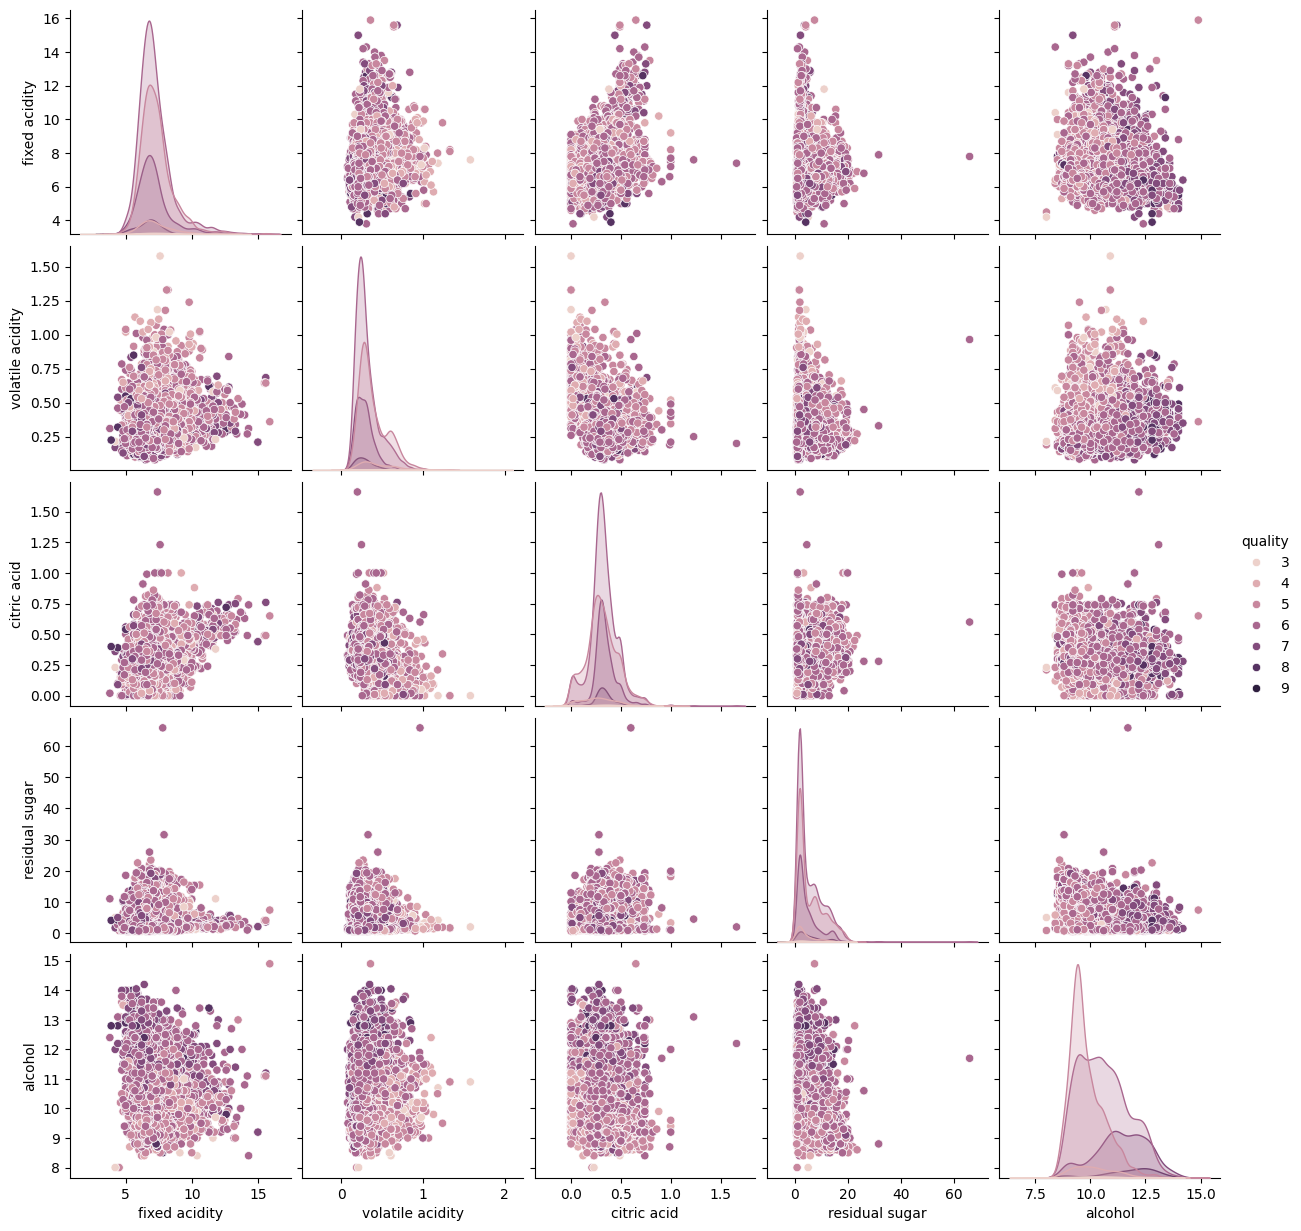

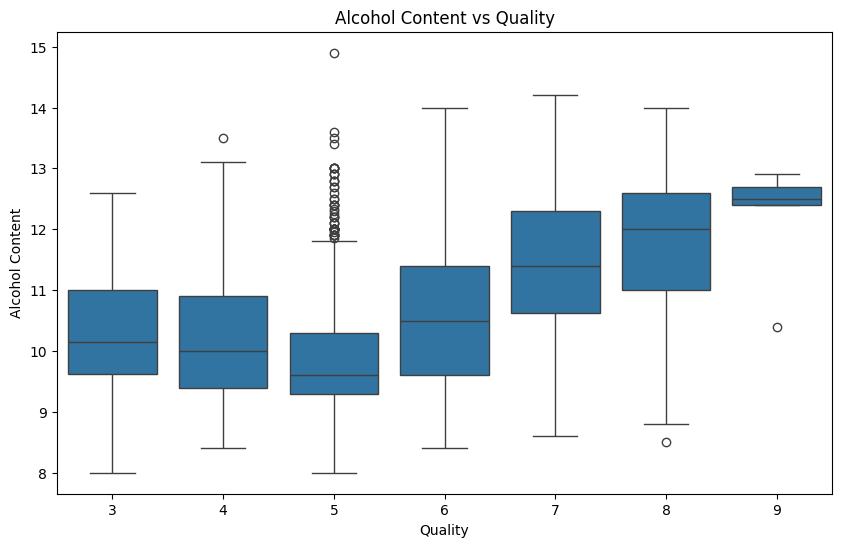

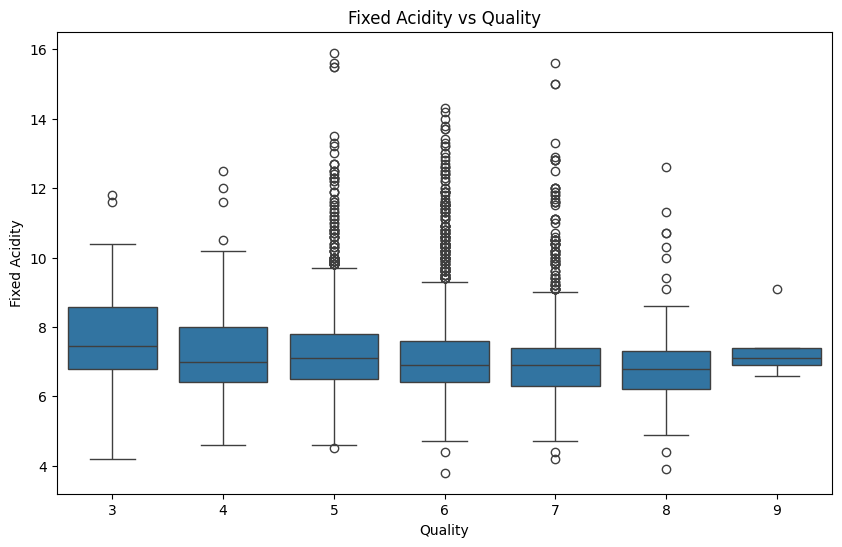

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('combined_winequality.csv', sep=';')

# Display the first few rows of the dataset
print(data.head())

# Display the shape of the dataset
print("Shape of the dataset:", data.shape)

# Display data types of each column
print(data.dtypes)

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected features
sns.pairplot(data, hue='quality', vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol'])
plt.show()

# Alcohol vs Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=data)
plt.title('Alcohol Content vs Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

# Fixed Acidity vs Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='fixed acidity', data=data)
plt.title('Fixed Acidity vs Quality')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

#### Finding correlation

In [7]:

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlation of each feature with the target variable 'quality'
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)

# Display the correlation values
print(quality_correlation)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


## Random Forest Regressor model

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = data.drop('quality', axis=1)  # Features
y = data['quality']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.3f}')  # Format to 3 decimal places
print(f'R^2 Score: {r2:.3f}')  # Format to 3 decimal places



Mean Squared Error: 0.371
R^2 Score: 0.497


#### Summary

The following are the model's performance metrics:

R2 Score: 0.497; Mean Squared Error (MSE): 0.371

With the R2 score indicating that the model captures roughly 49.7% of the variation in the data, these metrics show that the model has a moderate predictive accuracy.

### Scatter plot of actual vs predicted values, Plot residuals, Perform cross-validation

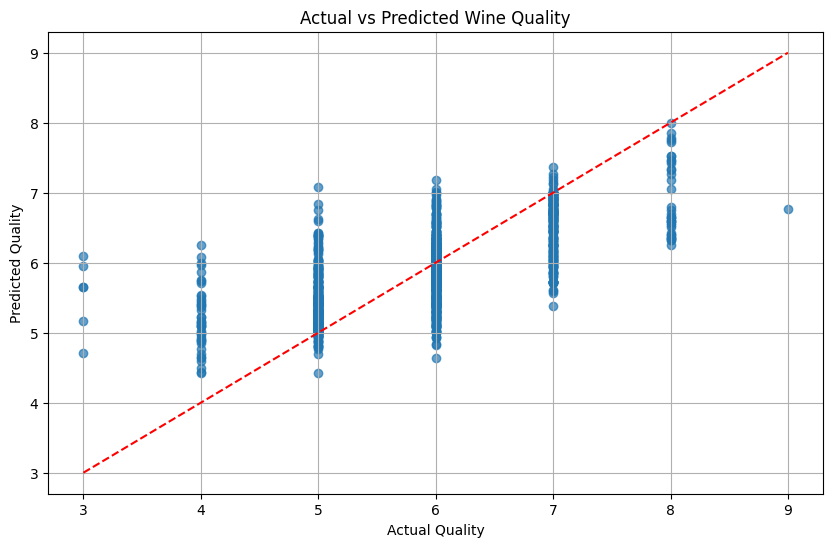

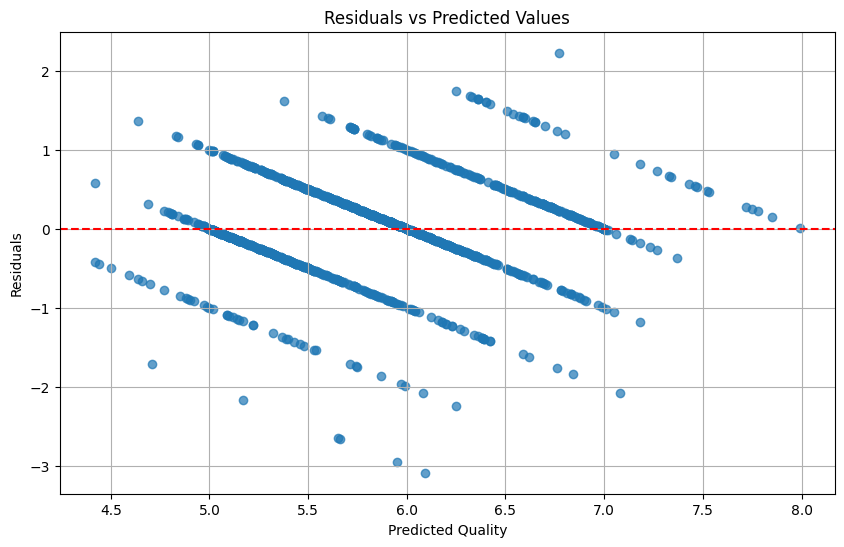

Cross-Validated RMSE: 0.739209314436778 ± 0.03556426457587208


In [9]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.title('Actual vs Predicted Wine Quality')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.grid()
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.grid()
plt.show()

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores)**0.5  # Convert to RMSE
print(f'Cross-Validated RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}')

#### Summary
With a standard deviation of ±0.036, the model's cross-validated Root Mean Squared Error (RMSE) is roughly 0.739.  This suggests resilient performance since the model's prediction error is relatively uniform across many data subsets.

### Evaluate 3 models

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse}, R^2 Score: {r2}')

Random Forest - Mean Squared Error: 0.3713522307692308, R^2 Score: 0.49718520459177784
Linear Regression - Mean Squared Error: 0.5466964419580572, R^2 Score: 0.259767312979018
Decision Tree - Mean Squared Error: 0.7284615384615385, R^2 Score: 0.013655475650245497


Mean Squared Error (MSE) and the coefficient of determination (R2 score) were used in this study to evaluate the predictive power of three different machine learning models. Decision Tree, Random Forest, and Linear Regression were the models that were assessed.

Random Forest: R2 Score: 0.497; Mean Squared Error (MSE): 0.371
Out of the three models, the Random Forest model has the lowest mean square error (MSE) and the greatest R2 score, indicating that it provides the best fit to the data and the highest predicted accuracy.

Mean Squared Error (MSE) for Linear Regression: 0.547
Score for R2: 0.260
In comparison to the Random Forest model, the Linear Regression model performed moderately well, with a lower R2 score and a larger MSE. This suggests that it records less data variance.

Decision Tree: R2 Score: 0.014; Mean Squared Error (MSE): 0.728
The Decision Tree model performed poorly as a predictor and fit the data poorly, as evidenced by its highest MSE and lowest R2 score.


In conclusion
In terms of predicted accuracy and data fit, the Random Forest model performs better than the Linear Regression and Decision Tree models, according to the evaluation metrics. For this specific dataset and prediction objective, the Random Forest model is advised. To maximize model performance, more fine-tuning and validation might be required.
